In [26]:
import numpy as np
#from numpy import array, zeros, diag, diagflat, dot
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
plt.rcParams["figure.figsize"] = (20,20)

In [27]:
n = 203
q = 1.025
dx = 0.025

a_mat = np.zeros((n,n))
vec_mat = np.zeros(n)
x_i = np.arange(1,n+1)
i = np.copy(x_i)

In [28]:
x = dx * ( x_i - (n +1)/2) 

In [29]:
#defining potential function
def U(q,x,i):
    return 0.5 * ( (3*q-2) * x**2 + (q-1)**2 * x**4) / (1+(q-1)*x**2)**2

#box potential
box_potential = np.where((x>-2)&(x<2),0,1)

In [42]:
def schrod( x, dx ,pot):
    diag = 2 + 2 * dx**2 * U(q,x,i)
    diag
    off_diags = -diag[:-1] * np.ones(len(diag)-1)
    w, v = eigh_tridiagonal(diag,off_diags)
    return w, v

In [43]:
v = schrod(x,dx,box_potential)[1]
v

array([[ 0.00261446, -0.00382753, -0.0050054 , ..., -0.00508485,
        -0.00468039,  0.00600887],
       [ 0.00522494, -0.00764755, -0.00999492, ...,  0.01014174,
         0.00934314, -0.01199577],
       [ 0.00782753, -0.01145265, -0.01495288, ..., -0.01514345,
        -0.01397122,  0.01793949],
       ...,
       [ 0.00703881,  0.01168204, -0.01488981, ..., -0.01493077,
         0.01912431,  0.0121087 ],
       [ 0.00469828,  0.00780043, -0.00995238, ...,  0.00999892,
        -0.01278873, -0.00809652],
       [ 0.00235088,  0.00390395, -0.00498397, ..., -0.00501313,
         0.00640629,  0.00405558]])

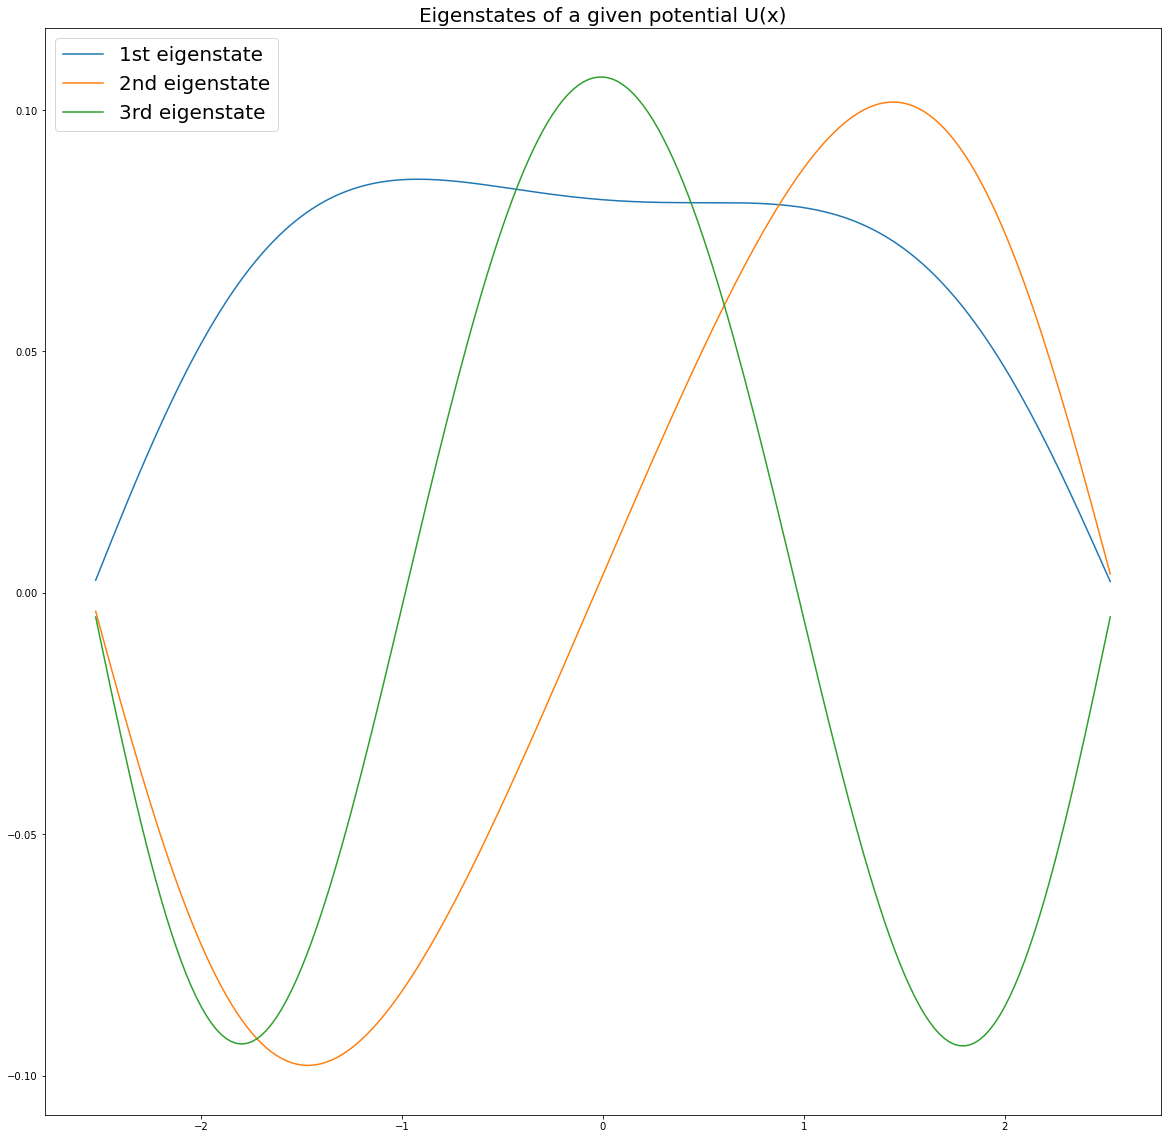

In [44]:
plt.title("Eigenstates of a given potential U(x)",fontsize=20)
plt.plot(x,v.T[0],label="1st eigenstate")
plt.plot(x,v.T[1],label="2nd eigenstate")
plt.plot(x,v.T[2],label="3rd eigenstate")
plt.legend(fontsize=20)
plt.savefig("eigstate.png",facecolor="w")
